In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
from mdt import *

#import mdt.mdt_parse as mp
#import mdt.mdt_stat as ms
#import importlib as imp
#imp.reload(mp)


# Parser
## Markdown

In [2]:
dta = mp.parse_md_files("../mdt/mdt/mdt_demo.md")
dta.head()
#dta

,Filename,ID,T1,T2,T3,TXT
0,mdt_demo,2.0.0,T2,None,None,You can use additional markups:
1,mdt_demo,2.0.0,T2,None,None,* [] Task2
2,mdt_demo,2.0.0,T2,None,None,* [v] Task2 #tag1:1 #tag2:1.5 #tag1
3,mdt_demo,2.0.0,T2,None,None,* [v] #tag2:2 [v] #tag2:3.5
4,mdt_demo,2.1.0,T2,T2-1,None,* [v] Task21 #tag1


## TaskPaper

In [3]:
mp.P_T1 = r"^(.*):$"
mp.C_TITLE = ":"
dta = mp.parse_md_files("../mdt/mdt/mdt_demo*.taskpaper")
dta

,Filename,ID,T1,T2,T3,TXT
0,mdt_demo1,1.0.0,Prj1,None,None,- Task1
1,mdt_demo1,1.0.0,Prj1,None,None,- Task2 @done(2017-01-02)
2,mdt_demo1,2.0.0,Prj2,None,None,- Task3 @p(1) @done(2017-01-02)
3,mdt_demo1,2.0.0,Prj2,None,None,- Task4 @p(3) @p(2)
0,mdt_demo2,1.0.0,Prj1,None,None,- Task5
1,mdt_demo2,1.0.0,Prj1,None,None,- Task6 @done(2017-01-09)
2,mdt_demo2,2.0.0,Prj2,None,None,- Task7 @p(1) @done(2017-01-10)
3,mdt_demo2,2.0.0,Prj2,None,None,- Task8 @p(3) @p(2)


# Stats

In [4]:
reload(ms)
dta.apply(ms.stat_journal,axis=1)

,done,p
0,NaN,NaN
1,2017-01-02,NaN
2,2017-01-02,1.0
3,NaN,5.0
0,NaN,NaN
1,2017-01-09,NaN
2,2017-01-10,1.0
3,NaN,5.0


In [5]:
eload(ms)
ms.add_stat(dta, "done,p")

,Filename,ID,T1,T2,T3,TXT,done,p
0,mdt_demo1,1.0.0,Prj1,None,None,- Task1,NaN,NaN
1,mdt_demo1,1.0.0,Prj1,None,None,- Task2 @done(2017-01-02),2017-01-02,NaN
2,mdt_demo1,2.0.0,Prj2,None,None,- Task3 @p(1) @done(2017-01-02),2017-01-02,1.0
3,mdt_demo1,2.0.0,Prj2,None,None,- Task4 @p(3) @p(2),NaN,5.0
0,mdt_demo2,1.0.0,Prj1,None,None,- Task5,NaN,NaN
1,mdt_demo2,1.0.0,Prj1,None,None,- Task6 @done(2017-01-09),2017-01-09,NaN
2,mdt_demo2,2.0.0,Prj2,None,None,- Task7 @p(1) @done(2017-01-10),2017-01-10,1.0
3,mdt_demo2,2.0.0,Prj2,None,None,- Task8 @p(3) @p(2),NaN,5.0


# Visualization

## Bokeh

In [1]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

NameError: name 'output_file' is not defined

## ggolpt

In [11]:
from ggplot import *
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Install\Conda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


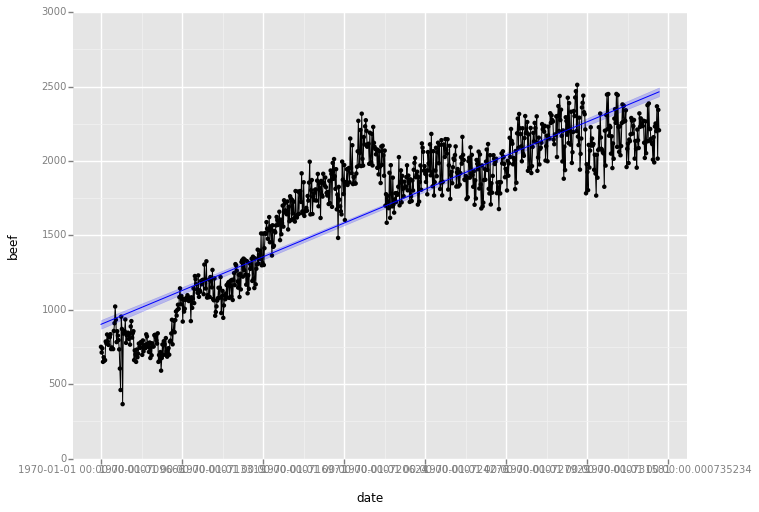

<ggplot: (138600597922)>

In [16]:
p = ggplot(aes(x='date', y='beef'), data=meat)
p + geom_point() + geom_line() + stat_smooth(color='blue')

# Dropbox I/O

In [37]:
auth_token = "bdOpEz-TVPwAAAAAAAAzs3AZSPeNDDDyZiaioA4gMK2LMoazNL5x5XrJgjawNJw4"
dbx = dropbox.Dropbox(auth_token)
dbx.users_get_current_account()
dbx.files_list_folder("")
#dbx.files_upload('!!!', "/Hello2", )

ListFolderResult(entries=[FileMetadata(name='20170101.taskpaper', id='id:DKtWu_T6HIQAAAAAAAIykQ', client_modified=datetime.datetime(2017, 2, 2, 19, 25, 4), server_modified=datetime.datetime(2017, 2, 6, 19, 21, 54), rev='353e8a877', size=1994, path_lower='/20170101.taskpaper', path_display='/20170101.taskpaper', parent_shared_folder_id=None, media_info=None, sharing_info=None, property_groups=None, has_explicit_shared_members=None), FileMetadata(name='20170108.taskpaper', id='id:DKtWu_T6HIQAAAAAAAI7kg', client_modified=datetime.datetime(2017, 2, 2, 19, 24, 58), server_modified=datetime.datetime(2017, 2, 6, 19, 21, 54), rev='453e8a877', size=2224, path_lower='/20170108.taskpaper', path_display='/20170108.taskpaper', parent_shared_folder_id=None, media_info=None, sharing_info=None, property_groups=None, has_explicit_shared_members=None), FileMetadata(name='20170115.taskpaper', id='id:DKtWu_T6HIQAAAAAAAJGrA', client_modified=datetime.datetime(2017, 2, 2, 19, 24, 52), server_modified=dateti

In [43]:
root = ''
for entry in dbx.files_list_folder(root).entries:
    print(entry.name)
    md, res = dbx.files_download('/'+entry.name)

20170101.taskpaper
20170108.taskpaper
20170115.taskpaper
20170122.taskpaper
20170129.taskpaper
20170205.taskpaper


b'Works\\MSFT:\nSAM Wrap-up\n- SAM quality experiment\n\nWork\\CSI:\n- Contact E1 guests\n\t- CSI roadmap\n- Revamp HP / FB page\n- Write announcement\n\nWork\\MDT:\n\nWeb frontend\n- Dropbox API https://github.com/dropbox/dropbox-sdk-python\n\nETC:\n- \xec\xb0\xbd\xeb\xb0\x9c reimbursement @done(2017-02-06)\n- Send tax form to Mira\n- Transfer Comcast acct\n- V-day gift?\n\nMoving:\n- Double-check APT (possible delay)\n\n\n2017-02-05:\nCostco return fiasco\n\tKeep receipts in place\n\tNOT HAPPENING AGAIN!!!\n\nTHE INFORMATION is great\n\tA lot of info on how Snap operates\n\tBusiness environment surrounding it\n\n2017-02-06:\nMDT:Web first steps\n\thttps://blogs.dropbox.com/developers/2013/08/dropbox-core-api-and-oauth-2-the-hard-way/\n\thttps://www.dropbox.com/developers/apps/info/vmadgs83odog3pl\n\t\n'

In [55]:
res.content.decode().split("\n")
md.name

'20170205.taskpaper'

In [4]:
reload(mp)
auth_token = "bdOpEz-TVPwAAAAAAAAzs3AZSPeNDDDyZiaioA4gMK2LMoazNL5x5XrJgjawNJw4"
mp.import_from_dropbox(auth_token, 'tmp')
dt = mp.parse_md_files("./tmp/"+"*.taskpaper")


# Test

In [6]:
"a b c".split(" ")

['a', 'b', 'c']

In [7]:
reload(ms)
print(ms.P_TAG2)
text = ["abc @tag def", "a @tag(value!) c @tag2", "@done(2015-01-01)", "@p(1)"]
for t in text:
    print("## ", t)
    print(re.findall(ms.P_TAG, t))
    print(re.findall(ms.P_TAG2, t))


\@(\w+)\(([-\w]+)\)?
##  abc @tag def
['@tag']
[]
##  a @tag(value!) c @tag2
['@tag(value!)', '@tag2']
[('tag', 'value')]
##  @done(2015-01-01)
['@done(2015-01-01)']
[('done', '2015-01-01')]
##  @p(1)
['@p(1)']
[('p', '1')]


In [7]:
import yaml
mc = open("mdt_config.yaml","r").read()
yaml.load(mc)

{'auth_token': 'bdOpEz-TVPwAAAAAAAAzs3AZSPeNDDDyZiaioA4gMK2LMoazNL5x5XrJgjawNJw4'}

# Deprecated